# Question: Gram-Schmidt Algorithm & QR Decomposition

**i.** Write a code to generate a random matrix A of size $m × n$ with $m > n$ and calculate its Frobenius norm, $|| \cdot ||_F$. The entries of A must be of the form r.dddd (example 5.4316). The inputs are the positive integers m and n and the output should display the the dimensions and the calculated norm value.



> **Deliverable(s) : The code with the desired input and output (0.5)**

In [404]:
# Import required libraries
from typing import List, Tuple
import random, math
import copy

**A function to generate a random entry**

In [ ]:
def generate_random_entry() -> float:
    """[Returns a random number of the form r.dddd]

    Returns:
        float: A random number
    """

    digits = ""
    for i in range(5):
        dig = random.randint(0, 9)
        if i == 4: dig = random.randint(1, 9)
        digits = digits + str(dig)
        if i == 0: digits += "."
    return float(digits)

$$
\pagebreak
$$

**Create a random matrix of m x n**

In [ ]:
def create_random_matrix(m:int, n:int, wide:bool = False) -> List:
    """[Takes in the number of rows and columns and generates a matrix of size m x n]

    Args:
        m (int): Number of rows of the matrix
        n (int): Number of columns of the matrix
        wide (bool, default = False): Whether wider or square matrix are allowed

    Returns:
        List: A matrix as a list of lists
    """
    if not wide:
        if m <= n:
            print("Error: Requested matrix is square or wide; It must be tall. Please give m > n")
            return []
    
    A = []
    for i in range(m):
        ith_row = []
        for j in range(n):
            ith_row.append(generate_random_entry())
        A.append(ith_row)
    
    return A

$$
\pagebreak
$$

**Compute the frobenius norm of a matrix**

In [188]:
def frob_norm(A: List) -> Tuple:
    """[Takes in a matrix A and computes the frobenius norm of that matrix]

    Args:
        A (List): A matrix represented as List of Lists

    Returns:
        Tuple: [The frobenius norm of the matrix, and the number of additions, multiplications, divisions needed to compute the norm of the matrix]
    """
    
    if len(A) == 0:
        print("Empty matrix passed. Pass a finite matrix")
        return -1.0
    if len(A[0]) == 0:
        print("Empty matrix passed. Pass a finite matrix")
        return -1.0
    
    additions, multiplications, divisions, root = -1, 0, 0, 0
    fro_norm = 0.0

    for row in A:
        for element in row:
            fro_norm += element * element
            additions += 1
            multiplications += 1
    
    fro_norm = (fro_norm) ** 0.5
    root += 1
    return (fro_norm, (additions, multiplications, divisions, root))

$$
\pagebreak
$$
**Convenience function to display a matrix A**

In [132]:
def display_matrix(A):
    """
    Convenience function to display a matrix in pretty formatting
    """
    nr = len(A)
    nc = len(A[0])
    matrix_string = "        "
    for col in range(nc):
        matrix_string += f"C{col+1:<7}"
    matrix_string += "\nR1   "
    for idx, r in enumerate(A):
        for element in r:
            matrix_string += f"{element: .4f} "
        if idx < nr - 1:
            matrix_string += f"\nR{idx + 2:<3} "
    print(matrix_string)

In [133]:
# Try generating a random wide matrix
# Expected Output: Error!
A = create_random_matrix(4, 5)

Error: Requested matrix is square or wide; It must be tall. Please give m > n


In [134]:
# Try generating a tall matrix
# Expected Output: A tall matrix
A = create_random_matrix(5, 4)
display_matrix(A)

        C1      C2      C3      C4      
R1    4.0136  0.9824  7.1691  8.0633 
R2    7.4286  3.9179  5.7864  1.5765 
R3    9.8305  6.7561  6.3717  3.2287 
R4    8.1671  9.6811  5.3238  6.1795 
R5    5.3595  0.4526  5.3378  0.0007 


In [135]:
# Try caluclating frobenius norm of generated matrix
# Expected Output: A float
n, _ = frob_norm(A)
print(f"Frobenius Norm of matrix A: {n:0.5f}")

Frobenius Norm of matrix A: 26.78938


$$
\pagebreak
$$

**ii** Write a code to decide if Gram-Schmidt Algorithm can be applied to columns of a given matrix A through calculation of rank. The code should print appropriate messages indicating whether Gram-Schmidt is applicable on columns of the matrix or not.

> **Deliverable(s) : The code that performs the test. (1)**

**Methodology**

- Find the row reduced echelon form of the given matrix

- If rank of the matrix = number of columns of A $\Rightarrow$ A has LI columns $\Rightarrow$ A can be decomposed into $QR$ form

- If rank of matrix is less than number of columns of A, A has Linearly Dependent columns $\Rightarrow$ A cannot be expressed as $QR$

**PS**

- To check if an element is zero in REF, we use a very small threshold value of 1e-6. Since computationally, we can get numbers very close to zero but not actually zero while performing row reduction; we are bound to take some small threshold value for near zero quantities.

*Define some functions to perform elementary matrix operations i.e. inner product, vector addition and scalar multiplication, matrix multiplication, matrix transpose and eventually column normed matrix. These functions will also help us in later computations throughout the assignment*

$$
\pagebreak
$$
**Function to compute the inner product of two vectors**

In [153]:
def inner_product(v1:List, v2:List) -> Tuple:
    """Given two vectors v1 and v2, computes their inner product

    Args:
        v1 (List): [A vector represented as a list]
        v2 (List): [A vector represented as a list]

    Returns:
        Tuple: [A tuple of the inner product & number of additions, multiplications and divisions needed for performing the inner product]
    """
    
    # Here initialize addition to -1 because to compute the inner product of two 
    # n dimensional vectors we only need n - 1 additions and n multiplications
    additions, multiplications, divisions = -1, 0, 0
    
    dot_product = 0.0
    for e1, e2 in zip(v1, v2):
        dot_product += e1 * e2
        additions += 1; multiplications += 1
    
    return (dot_product, (additions, multiplications, divisions))

$$
\pagebreak
$$
**Function to compute vector addition of two vectors**

In [154]:
def vector_addition(v1:List, v2:List) -> Tuple:
    """[Given two vectors, adds them and computes the number of +, -, / needed for the same]

    Args:
        v1 (List): [A vector represented as a list]
        v2 (List): [A vector represented as a list]

    Returns:
        Tuple: [A tuple representing vector subtraction result and the number of +, -, / needed to compute the result]
    """
    
    additions, multiplications, divisions = 0, 0, 0
    resultant = []
    
    for e1, e2 in zip(v1, v2):
        resultant.append(e1 + e2)
        additions += 1
    
    return (resultant, (additions, multiplications, divisions))

$$
\pagebreak
$$
**Function to compute scalar multiplication of a scalar with a vector**

In [155]:
def scalar_multiplication(v1:List, k: float) -> Tuple:
    """[Given a vector and a scalar, scales the vector appropriately]

    Args:
        v1 (List): [A vector represented as a list]
        k (float): [A scalar]

    Returns:
        Tuple: [A tuple representing scalar multiplication result and the number of +, -, / needed to compute the result]
    """
    
    additions, multiplications, divisions = 0, 0, 0
    resultant = []
    
    for e1 in v1:
        resultant.append(k * e1)
        multiplications += 1
    
    return (resultant, (additions, multiplications, divisions))

$$
\pagebreak
$$

**Function to perform matrix multiplication of two matrices A & B**

In [156]:
def matrix_multiplication(A:List, B:List) -> Tuple:
    """[Given two matrices as list of lists, computes their matrix product]

    Args:
        A (List): [A matrix of dimension m x n]
        B (List): [A matrix of dimension n x m]

    Returns:
        List: [A tuple of Matrix product as a list of lists and the number of additions, multiplications and divisions needed for performing the operation]
    """

    a, m, d = 0, 0, 0

    nrA, ncA = len(A), len(A[0])
    nrB, ncB = len(B), len(B[0])

    if ncA != nrB:
        print("Matrix dimension mismatch, please input valid matrices")
        return ([], (a, m, d))
    
    B_columns = []
    # Get a list of the columns of B
    for c in range(ncB):
        col = []
        for r in range(nrB):
            col.append(B[r][c])
        B_columns.append(col)
    
    resultant_matrix = []
    
    # Iteratively multiply rows of A and columns of B in order to 
    # Compute the product A matmul B
    for row in A:
        resultant_row = []
        for column in B_columns:
            abij, (add, mult, div) = inner_product(row, column)
            a += add; m += mult; d += div
            resultant_row.append(abij)
        resultant_matrix.append(resultant_row)
    
    return (resultant_matrix, (a, m, d))

$$
\pagebreak
$$
**Function to compute the transpose of a matrix A**

In [157]:
def matrix_transpose(A:List) -> List:
    """[Given a matrix A, generate it's transpose]

    Args:
        A (List): [A matrix represented as list of lists]

    Returns:
        List: [Transpose of the matrix represented as list of lists]
    """
    
    # Find the rows and columns of A
    nr, nc = len(A), len(A[0])
    
    # Create a container for A_transpose
    A_transpose = []

    # Compute the transpose of A
    for c in range(nc):
        col = []
        for r in range(nr):
            col.append(A[r][c])
        A_transpose.append(col)
    
    return A_transpose

$$
\pagebreak
$$
**Function to compute the column normalized version of a matrix**

In [136]:
def normalize_columns(A: List) -> Tuple:
    """[Given a matrix A, normalizes it's columns using l2-norm and returns the normalized matrix as a List of lists and also the number of +, -, /, sqrt needed for computing the result]
    Args:
        A (List): [Matrix represented as list of lists]
    Returns:
        Tuple: [A tuple of the normalized matrix and the count of +,-,/ needed for generating the matrix]
    """
    # Initialize the number of additions, multiplications, divisions to zero
    a, m, d, root = 0, 0, 0, 0

    # If given matrix is a null matrix, return a null matrix
    if len(A) == 0:
        return ([], (a, m, d))
    if len(A[0]) == 0:
        return ([[]], (a, m, d))
    
    # Find the number of rows and columns of matrix A
    nr, nc = len(A), len(A[0])
    # First get the columns of A 
    A_columns = matrix_transpose(A)
    # Compute the normed column matrix now
    normalizedA = []

    for col in A_columns:
        dot_product, (add, mult, div) = inner_product(col, col)
        a += add; m+= mult; d += div
        
        l2norm = (dot_product) ** 0.5
        root += 1
    
        scaled_vector, (add, mult, div) = scalar_multiplication(col, 1 / l2norm)
        # Since I have considered division ads multiplication with reciprocal here, I am adding the scaling multiplications to division count here
        d += mult        
        normalizedA.append(scaled_vector)
        
    # Get the matrix A in row major order again
    normedARowMajor = matrix_transpose(normalizedA)   
    return (normedARowMajor, (a, m, d, root))    

$$
\pagebreak
$$

**Functions to move from flat nd vectors to a tall matrix of width 1 and vice versa**

In [245]:
def flatten_column_matrix(m: List) -> List:
    """[Flatten a column matrix of n x 1 into an n-dimensional vector]

    Args:
        m (List): [A tall matrix of width 1]

    Returns:
        List: [A flattened vector]
    """
    return [x[0] for x in m]

def expand_column_vector(m: List) -> List:
    """[Convert a flat n-dimensional column vector into an n x 1 matrix]

    Args:
        m (List): [A flat nd vector]

    Returns:
        List: [A tall width=1 matrix]
    """
    return [[x] for x in m]

$$
\pagebreak
$$

**Now we will start with the real qn 1.ii by taking help of the functions defined above. Define a function to compute the row reduced echelon form of a matrix**

In [158]:
def rreduce(A:List, threshold:float = 1e-6) -> Tuple:
    """[Given a matrix A as a list of lists, compute it's row reduced echelon form.
    Return that along with the rank of the matrix]

    Args:
        A (List): A m x n tall matrix
        threshold (float, optional): When comparing the pivot elements, what magnitude of a value counts as zero magnitufe. Defaults to 1e-6.

    Returns:
        Tuple: A tuple of row reduced echelon form and the decision i.e. whether
        the matrix has linearly independent columns or not
    """
    
    # Initialize the number of additions, multiplications divisions to null
    a, m, d = 0, 0, 0
    
    # Create a copy of the original matrix otherwise original
    # matrix will get overwritten
    A = copy.deepcopy(A)
    
    # Check if the matrix is empty
    if len(A) == 0:
        return ([], False)
    if len(A[0]) == 0:
        return ([[]], False)
    
    # Find out number of rows and columns
    nr, nc = len(A), len(A[0])            
    
    # Get Echelon form using row reduction operations
    # Only iterate for as many times as number of columns since 
    # tall matrix can't have more pivot elements than number of columns
    for i in range(nc - 1):
        
        pivot_element = A[i][i]
        
        # Make all the elements below the pivot to be zero
        # in an iterative manner
        for j in range(i + 1, nr):
                        
            # Find the pivot element and compute the scaling factor
            div_factor = A[j][i] / pivot_element     
            d += 1
            
            # Scale the ith row based on the above factor
            scaled_vector, (add, mult, div) = scalar_multiplication(A[i], -1 * div_factor)
            a += add; m += mult; d += div;
            
            # Subtract the scaled row from A[j]
            transformed_row, (add, mult, div) = vector_addition(A[j], scaled_vector)
            
            # Deduct the counts of add and mult by (i + 1) because when 
            # doing row reduction we are computing pivots in such a way 
            # that the elements below the pivot should become zeros 
            # and the elements to the left of the pivot are already zeros
            # so no need to compute that term again and add it
            add -= (i + 1); mult -= (i + 1);
            a += add; m += mult; d += div;
            
            A[j] = transformed_row
    
    # Check the leading diagonal entries; I a few of them are zeros 
    # or near zeros, then given matrix has rank lower than nc(A)
    col_rank = True
    for i in range(nc):
        if abs(A[i][i]) <= threshold:
            col_rank = False
            break
                    
    return (A, col_rank, (a, m, d))

$$
\pagebreak
$$

In [159]:
# Create a random tall matrix
# Expected output: A tall matrix
A = create_random_matrix(5,4)
display_matrix(A)

        C1      C2      C3      C4      
R1    7.1086  4.2724  3.6789  9.2282 
R2    4.8841  9.3567  1.4473  4.8806 
R3    1.2859  0.6668  9.9826  9.9426 
R4    4.2317  9.9772  6.9267  1.1352 
R5    7.0563  8.4662  8.1118  1.8957 


In [160]:
# Row reduce the matrix into it's REF and see if it's columns are linearly independent
# Expected output: REF of generated matrix, primitive operations count, whether cols are LI
ref, dec, (a, m ,d) = rreduce(A)
display_matrix(ref)
print(f"\nAdds  required {a:02d}\nMults required {m:02d}\nDivs  required {d:02d}\n")
if dec == True:
    print(f"A has linearly independent columns. Can apply GS Algorithm.")
else:
    print(f"A has linearly dependent columns. Cannot apply GS Algorithm.")

        C1      C2      C3      C4      
R1    7.1086  4.2724  3.6789  9.2282 
R2    0.0000  6.4213 -1.0804 -1.4598 
R3    0.0000  0.0000  9.2993  8.2492 
R4    0.0000  0.0000  0.0000 -7.9796 
R5    0.0000  0.0000  0.0000 -10.8910 

Adds  required 20
Mults required 20
Divs  required 09

A has linearly independent columns. Can apply GS Algorithm.


In [161]:
# Purposely generate a matrix where rows are linearly dependent
# And check if the GS Algorithm can be applied to this matrix
# Expected output: r < nc => Cannot apply GS Algorithm
r1 = [generate_random_entry() for i in range(3)]
r2 = [generate_random_entry() for i in range(3)]
r3 = [0.1*(x + y) for x, y  in zip(r1, r2)]
r4 = [(x - y)/2 for x, y in zip(r2, r3)]
A = [r1,r2,r3,r4]

In [162]:
display_matrix(A)

        C1      C2      C3      
R1    0.0477  8.9017  5.6728 
R2    8.2004  7.0484  8.8143 
R3    0.8248  1.5950  1.4487 
R4    3.6878  2.7267  3.6828 


In [163]:
# Row reduce the matrix into it's REF and see if it's 
# columns are linearly independent
# Expected output: REF of generated matrix, primitive
# operations count, whether cols are LI
ref, dec, (a, m ,d) = rreduce(A)
display_matrix(ref)
print(f"\nAdds  required {a:02d}\nMults required {m:02d}\nDivs  required {d:02d}\n")
if dec == True:
    print(f"A has linearly independent columns. Can apply GS Algorithm.")
else:
    print(f"A has linearly dependent columns. Cannot apply GS Algorithm.")

        C1      C2      C3      
R1    0.0477  8.9017  5.6728 
R2    0.0000 -1523.2975 -966.4316 
R3    0.0000  0.0000  0.0000 
R4    0.0000  0.0000 -0.0000 

Adds  required 08
Mults required 08
Divs  required 05

A has linearly dependent columns. Cannot apply GS Algorithm.


$$
\pagebreak
$$

**iii**: Write a code to generate the orthogonal matrix Q from a matrix A by performing the Gram-Schmidt orthogonalization method. Ensure that A has linearly independent columns by checking the rank. Keep generating A until the linear independence is obtained.

> **Deliverable(s) : The code that produces matrix Q from A (1)**

In [195]:
def gram_schmidt_orthogonalization(A: List) -> Tuple:
    """[Given a matrix A, checks if it's columns are Linearly Independent and if yes, generates an orthogonal matrix from the same]

    Args:
        A (List): [Matrix represented as list of lists]

    Returns:
        Tuple: (A tuple representing whether A contains linearly independent columns and if yes, an orthogonal matrix generated from A)
    """
    
    # If the vector is null then simply return
    if len(A) == 0:
        return (False, [])
    if len(A[0]) == 0:
        return (False, [[]])
    
    # Compute the number of rows and columns of matrix A
    nr, nc = len(A), len(A[0])
    A_columns = matrix_transpose(A)
    
    # Check if A has linearly independent columns or not
    # If no, then cannot apply GS Algorithm
    ref, dec, _ = rreduce(A)
    if not dec:
        return (False, [])
    print(f"\nThe given matrix A has linearly independent columns.\nHence we can compute Gram-Schmidt Orthogonalization\n\nREF of given matrix as follows\n") 
    display_matrix(ref)
    
    # Start generating an orthogonal basis for A
    v = []
    vi_inner_product = []

    # Initialize the addition, multiplication and division counts to zeros
    additions, multiplications, divisions = 0, 0, 0
    
    # Iterate over the columns of A
    for n in range(nc):

        xi = A_columns[n]
        vi = xi
        
        for it in range(n):
            
            # Compute xi.vi inner product
            xivi, (a, m, d) = inner_product(xi, v[it])
            additions += a; multiplications += m; divisions += d
            
            # Check if vi's inner product exists
            if it < (len(vi_inner_product)):
                vivi = vi_inner_product[it]
            else:
                vivi, (a, m, d) = inner_product(v[-1], v[-1])
                additions += a; multiplications += m; divisions += d
                vi_inner_product.append(vivi)
            
            scaling_factor = -1 * xivi / vivi
            divisions += 1
            
            scaled_vector, (a, m, d) = scalar_multiplication(v[it], scaling_factor)
            additions += a; multiplications += m; divisions += d

            vi, (a, m, d) = vector_addition(vi, scaled_vector)
            additions += a; multiplications += m; divisions += d
        
        v.append(vi)
    
    # Reframe the matrix in row major order
    O = matrix_transpose(v)
        
    return (O, (additions, multiplications, divisions))

$$
\pagebreak
$$

In [196]:
# Create a random matrix A and compute normalize their cols using gram schmidt orthogonalization procedure
# Expected output: The matrix and it's gram-schmidt orthogonalization matrix
x = create_random_matrix(5, 4)
print("Randomly Generated Matrix")
display_matrix(x)
v, (a, m, d) = gram_schmidt_orthogonalization(x)

if v:
    print(f"\nLinearly independent cols obtained from GSO procedure")
    display_matrix(v)

Randomly Generated Matrix
        C1      C2      C3      C4      
R1    0.1008  6.3822  1.9332  0.8202 
R2    6.0748  0.3064  4.5908  3.9357 
R3    4.5107  5.5223  5.5853  0.1209 
R4    2.4546  7.3966  5.1188  9.1374 
R5    4.0419  4.1145  0.8893  0.7767 

The given matrix A has linearly independent columns.
Hence we can compute Gram-Schmidt Orthogonalization

REF of given matrix as follows

        C1      C2      C3      C4      
R1    0.1008  6.3822  1.9332  0.8202 
R2    0.0000 -384.3225 -111.9152 -45.4944 
R3    0.0000  0.0000  0.6347 -3.4282 
R4    0.0000  0.0000  0.0000  12.8764 
R5    0.0000  0.0000  0.0000 -20.1520 

Linearly independent cols obtained from GSO procedure
        C1      C2      C3      C4      
R1    0.1008  6.3035 -0.2832 -1.5646 
R2    6.0748 -4.4392  0.7921  1.1892 
R3    4.5107  1.9986  0.9768 -4.4586 
R4    2.4546  5.4791  1.1281  4.2801 
R5    4.0419  0.9570 -2.9587  0.6281 


$$
\pagebreak
$$

**iv**: Write a code to create a QR decomposition of the matrix A by utilizing the code developed in the previous sub-parts of this question. Find the matrices Q and R and then display the value $||A - (QR)||_F$ , where $||\cdot||_F$ is the Frobenius norm. The code should also display the total number of additions, multiplications and divisions to find the result.

> **Deliverable(s) : The code with the said input and output. The results obtained for A generated with m = 7 and n = 5 with random entries described above. (2.5)**

**Methodology**

Computing gram-schmidt orthogonalization requires several steps as follows

- Verify A has LI columns $\Rightarrow$ Compute the REF and ascertain $Rank = nc(A)$

- If above condition is met, orthogonalize the columns of matrix A using GS algorithm

- Normalize columns of the orthogonal matrix obtained above

- $A = QR \Rightarrow Q^{-1}A = Q^{-1}QR \Rightarrow R = Q^TA \because Q^{-1} = Q^T \text{as Q is orthonormal}$

- Compute the matrix product $Q^TA$ to find $R$.

- Find out the primitive counts at each step of the procedure and report them individually and the totals as well.

In [405]:
# Create a random matrix
A = create_random_matrix(7, 5)

# Display the matrix generated
print("\nRandomly Generated Matrix")
display_matrix(A)

# Compute REF of the matrix and count the number of primitive operations incurred in the same
ref, decision, (aref, mref, dref) = rreduce(A)

if decision:
    # Apply GS Algorithm to find an orthogonal basis
    v, (ags, mgs, dgs) = gram_schmidt_orthogonalization(A)

    # Make the orthogonal basis into an orthonormal one
    Q, (anorm, mnorm, dnorm, rootnorm) = normalize_columns(v)
    
    # Compute the matrix R using the orthonormal matrix and the original matrix
    R, (aR, mR, dR) = matrix_multiplication(matrix_transpose(Q), A)
    
    # Compute the matrix QR
    QR, (aQR, mQR, dQR) = matrix_multiplication(Q, R)
    
    # Compute the matrix A - QR
    delta = []
    addDelta, multDelta, divDelta = 0, 0, 0
    for a_row, qr_row in zip(A, QR):
        scaled_vector, _ = scalar_multiplication(qr_row, -1)
        resultant, (a, m, d) = vector_addition(a_row, scaled_vector)
        addDelta += a; multDelta += m; divDelta += d
        delta.append(resultant)
    
    # Compute the frobenius norm of A - QR = delta
    fn, (afro, mfro, divfro, rootfro) = frob_norm(delta)
    
    
    # Display the matrices Q, R and A - QR respectively
    print(f"\nMatrix Q")
    display_matrix(Q)
    print(f"\nMatrix R")
    display_matrix(R)
    print(f"\nMatrix (A - QR)")
    display_matrix(delta)
    print(f"\nFrobenius norm of (A - QR) = {fn:.5f}")
    
    
    # Find out the counts for each and every step along the way
    total_additions = aref + ags + anorm + aR + addDelta + afro 
    total_multiplications = mref + mgs + mnorm + mR + multDelta + mfro
    total_divisions = dref + dgs + dnorm + dR + divDelta + divfro
    total_sqrts = rootnorm + rootfro
    
    count_matrix = [(aref, mref, dref, 0), (ags, mgs, dgs, 0), (anorm, mnorm, dnorm, rootnorm), (aR, mR, dR, 0), (addDelta, multDelta, divDelta, 0), (afro, mfro, divfro, rootfro), (total_additions, total_multiplications, total_divisions, total_sqrts)]
    
    import pandas as pd
    count_df = pd.DataFrame(count_matrix, index = ["REF", "GS Algorithm", "Orthonormalization", "R = Q'A Computation", "(A - QR) Computation", "Norm(A - QR) Computation", "Total Count"], columns = ["Additions", "Multiplications", "Divisions", "Square Root"])
count_df

Randomly Generated Matrix
        C1      C2      C3      C4      C5      
R1    6.1365  1.0361  3.1545  1.4542  8.8476 
R2    1.7695  8.5708  0.7573  7.0305  4.9097 
R3    0.8503  6.3664  4.6884  5.4526  6.5478 
R4    8.4884  6.9733  6.8779  9.2543  5.7732 
R5    0.9465  2.4735  1.7498  3.5662  7.8038 
R6    8.7554  8.0415  1.0145  4.4992  8.9681 
R7    2.1917  5.6678  1.7968  0.5019  0.2328 

The given matrix A has linearly independent columns.
Hence we can compute Gram-Schmidt Orthogonalization

REF of given matrix as follows

        C1      C2      C3      C4      C5      
R1    6.1365  1.0361  3.1545  1.4542  8.8476 
R2   -0.0000  8.2720 -0.1523  6.6112  2.3584 
R3    0.0000  0.0000  4.3659  0.2777  3.5476 
R4    0.0000 -0.0000  0.0000  2.6486 -10.1710 
R5    0.0000  0.0000  0.0000  0.0000  10.1318 
R6    0.0000  0.0000  0.0000  0.0000 -12.8033 
R7    0.0000 -0.0000  0.0000  0.0000 -21.5755 

Matrix Q
        C1      C2      C3      C4      C5      
R1    0.4384 -0.4005  0.1776 -

,Additions,Multiplications,Divisions,Square Root
REF,50,50,18,0
GS Algorithm,154,168,10,0
Orthonormalization,30,35,35,5
R = Q'A Computation,150,175,0,0
(A - QR) Computation,35,0,0,0
Norm(A - QR) Computation,34,35,0,1
Total Count,453,463,63,6


$$
\pagebreak
$$

# Question: Gradient Descent Algorithm

**i**: Consider the last 4 digits of your mobile number (Note : In case there is a 0 in one of the digits replace it by 3). Let it be $n_1n_2n_3n_4$. Generate a random matrix A of size $n_1n_2 \times n_3n_4$. For example, if the last four digits are 2311, generate a random matrix of size 23 × 11. Write a code to calculate the $l_{\infty}$ norm of this matrix.

> **Deliverable(s) : The code that generates the results. (0.5)**

In [398]:
def generate_gradient_descent_matrix() -> Tuple:
    """[Creates a matrix of the size n1n2 * n3n4 and a matrix b of size n1n2 * 1]

    Returns:
        List: A matrix in the form of a list
    """

    # Prompt the user for his mobile number
    
    # Ascertain the mobile number is valid
    number = input("Enter your phone number:\n")
    try:
        n = int(number)
        if len(number.strip()) != 10:
            print("Mobile number must have exactly 10 digits. Please enter a valid number")
            return ([], [])
    except Exception as e:
        print(f"{str(e)}\nEntered number invalid. Please enter a valid number")
        return ([], [])
    
    # Get the last 4 digits of the number and replace
    # 0s in the number with 3s
    rc = number.strip()[-4:]
    rc = rc.replace("0", "3")

    nr, nc = int(rc[:2]), int(rc[2:])
    matrix = create_random_matrix(nr, nc, wide = True)
    b = create_random_matrix(nr, 1, wide = True)
    
    return (matrix, b)

def linf_norm(matrix: List) -> float:
    """[Given a matrix computes it's linfinity norm]

    Args:
        matrix (List): [Matrix represented as a list of numbers]

    Returns:
        float: The infinity norm of the said matrix
    """
    
    inf_norm = 0

    # For each row in the matrix
    for row in matrix:
        rsum = 0

        # Compute the row sum of absolute vals of elements in that row
        for element in row:
            rsum += abs(element)

        # Store the largest row sum
        if rsum > inf_norm:
            inf_norm = rsum
    return inf_norm

$$
\pagebreak
$$

In [399]:
# Create the gradient descent matrices A & b. 
# Validate the input to have a proper mobile number
A, b = generate_gradient_descent_matrix()

Enter your phone number:
 sdfdsf


invalid literal for int() with base 10: 'sdfdsf'
Entered number invalid. Please enter a valid number


In [400]:
# Create the gradient descent matrices A & b. 
# Validate the input to have a proper mobile number
A, b = generate_gradient_descent_matrix()

Enter your phone number:
 6464568


Mobile number must have exactly 10 digits. Please enter a valid number


In [401]:
# Create the gradient descent matrices A & b. 
# Validate the input to have a proper mobile number
A, b = generate_gradient_descent_matrix()

Enter your phone number:
 773868556846845654


Mobile number must have exactly 10 digits. Please enter a valid number


In [403]:
# Create the gradient descent matrices A & b. 
# Validate the input to have a proper mobile number
A, b = generate_gradient_descent_matrix()
print(f"L-inf norm of the generated matrix A is {linf_norm(A):.5f}")

Enter your phone number:
 7738368566


L-inf norm of the generated matrix A is 380.58060


$$
\pagebreak
$$

**ii** Generate a random vector b of size $n_1n_2 \times 1$ and consider the function $f(x) = \frac{1}{2}||Ax - b||_2^2$ where $|| \cdot ||_2$ is the vector $l_2$ norm. Its gradient is given to be $\nabla f(x) = A^TAx - A^Tb$. Write a code to find the local minima of this function by using the gradient descent algorithm (by using the gradient expression given to you). The step size $\tau$ in the iteration $x_k + 1 = x_k − \tau \nabla f(x_k)$ should be chosen by the formula 

$$
\tau = \frac{g_k^Tg_k}{g_k^TA^TAg_k}
$$

where $g_k = \nabla f(x_k) = A^TAx_k - A^Tb$ The algorithm should execute
until $||x_k - x_{k - 1}||_2 < 10^{-4}$.

> **Deliverable(s) : The code that finds the minimum of the given function and the expression for $\tau$. The values of $x_k$ and $f(x_k)$ should be stored in a file.**

In [381]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", None)

def gradient_descent(stopping_threshold:float = 1e-4) -> List:
    """[Generates a random matrix based on user's mobile number, performs gradient descent and returns the solutions of the system of equation and intermediate steps taken]
    
    Args:
        stopping_threshold (float): [When to stop iterating, i.e. convergence criterion]
        
    Returns:
        List: [A list of solutions, intermediate values and function values at each step]
    """
    
    A, b = generate_gradient_descent_matrix()
    n_equations, n_features = len(A), len(A[0])
    
    # Start with an initial guess of all zeros
    current_solution = [[0.0] for r in range(n_features)]
    optimization_steps = []

    # Begin optimization here
    while True:
        
        # Find out the function value
        result = matrix_multiplication(A, current_solution)[0]
        scaled_b = scalar_multiplication(flatten_column_matrix(b), -1)[0]
        f = vector_addition(flatten_column_matrix(result), scaled_b)[0]
        fn = frob_norm(expand_column_vector(f))[0]
        func_val = 0.5 * (fn ** 2)
        

        # Find the gradient of the function at the current step 
        # i. Find AtAx
        A_transpose = matrix_transpose(A)
        AtA = matrix_multiplication(A_transpose, A)[0]
        AtAx = matrix_multiplication(AtA, current_solution)[0]
        
        # ii. Find Atb
        Atb = matrix_multiplication(A_transpose, b)[0]
        
        # iii. Find AtAx - Atb
        scaled_Atb = scalar_multiplication(flatten_column_matrix(Atb), -1)[0]
        gradf = vector_addition(flatten_column_matrix(AtAx), scaled_Atb)[0]
        gradf = expand_column_vector(gradf)
        
        # Compute the learning rate
        gradf_transpose = matrix_transpose(gradf)
        tau_nr = matrix_multiplication(gradf_transpose, gradf)[0][0][0]
        tau_dr = matrix_multiplication(gradf_transpose, matrix_multiplication(AtA, gradf)[0])[0][0][0]
        # To avoid numerical instability, add a very tiny epsilon to the denominator
        learning_rate = tau_nr / (tau_dr + 1e-16)
        
        # Take a step in the opposite direction of the gradient
        previous_solution = current_solution
        scaled_gradf = scalar_multiplication(flatten_column_matrix(gradf), -1 * learning_rate)[0]
        current_solution = vector_addition(flatten_column_matrix(previous_solution), scaled_gradf)[0]
        current_solution = expand_column_vector(current_solution)
        
        # Define the stopping criterion
        scaled_prev_sol = scalar_multiplication(flatten_column_matrix(previous_solution), -1)[0]
        step_delta = vector_addition(flatten_column_matrix(current_solution), scaled_prev_sol)[0]
        
        stopping_threshold = frob_norm(expand_column_vector(step_delta))[0]
        if abs(stopping_threshold) <= 1e-4:
            break

        optimization_steps.append([previous_solution, gradf, func_val])
    
    return optimization_steps

In [383]:
# Perform gradient descent by prompting the user for phone number and store the result obtained in a 
# CSV file with the points, gradients and the function value at that point 
solutions = gradient_descent()
df = pd.DataFrame(solutions, columns = ["Point", "Gradient", "FunctionValue"])

# Save the obtained solutions to a file
df.to_csv("solutions.csv", index = None);

Enter your phone number:
 7738368566


In [386]:
df.tail(1)

,Point,Gradient,FunctionValue
681,"[[-0.058967398210707546], [-0.29632870331270006], [-0.06463032397153941], [0.14936638936556615], [-0.24987774610441515], [0.20210566625648033], [0.10184743851017858], [-0.22160922062986746], [0.20055007880918474], [0.3289383427587664], [0.141392535836497], [-0.44350072380033456], [-0.18111446447898286], [0.24642767836215634], [-0.3944546083909666], [0.1467534984914903], [0.4675588258095588], [0.3252020621867888], [0.3299141159915386], [-0.3332965944639392], [0.28598199485776604], [0.31978213391519417], [-0.13268685320940257], [0.17693609426483964], [0.13859029846985274], [0.06470600296051265], [0.47631274447239597], [-0.08279485978498942], [0.11258563678385788], [0.1828316499463245], [-0.19473941767126318], [0.028444117828948668], [-0.03254736489024182], [0.06806189441890936], [-0.12368326010262692], [-0.2307638432944469], [0.07709391209079744], [-0.2368353261101296], [0.14615512326239088], [-0.03394216422980806], [-0.1655697046539449], [0.2322539318983307], [0.012894801465627216], [0.1498778931993199], [-0.12884364750899932], [0.018887738158668618], [0.34897401642222303], [-0.21849820307692883], [-0.22612384071201666], [0.15641181754548772], [-0.32547590762035267], [-0.04594696162949528], [-0.024983541064229658], [0.14901791055719077], [-0.12080298093259675], [0.07432625974871765], [0.19095095177048632], [-0.019589520425997257], [-0.17292497255652967], [0.25530005424931185], [-0.096925359766372], [0.048608965877388874], [-0.37795910797377186], [-0.12378345174376727], [0.0821267159310158], [-0.07180691877609308]]","[[0.14987355737093822], [0.3190519787970061], [0.0031789979470886465], [-0.22348092368611105], [0.40386463260711025], [0.005723363016159055], [0.08862092308254432], [0.03344068511023579], [0.2002370663565216], [-0.04880435346831291], [-0.03214700218768485], [-0.25060947769929953], [0.030489286958527373], [-0.38325802862755154], [0.3871532369603301], [0.3179608184927929], [-0.11573679263165104], [-0.20208887043236246], [-0.403722606278734], [0.5032624861912609], [0.021180348755478917], [-0.200022555954547], [0.1962333510668941], [0.1443904717834812], [-0.3116018283001267], [-0.17014126089134152], [-0.4437406785973508], [0.17482804455994483], [-0.22918629024479742], [0.24744190838327995], [-0.002368362460629214], [0.13264312105138742], [0.21985304067175093], [0.08036345856862681], [-0.1302626618225986], [0.3731468295909508], [-0.11291401193125239], [-0.025925709338707748], [-0.07773066248660143], [-0.005108987897529005], [0.3008771451281973], [-0.05178424772793733], [0.29850627973428345], [0.09334912431268094], [-0.010753229481906601], [0.30842921667090195], [-0.0901372814446404], [-0.07407848558727892], [-0.03678351562507487], [-0.2542470956809666], [0.11317676900102924], [-0.19882629058338352], [0.0710152086612652], [0.3432616420377599], [0.23845257313087131], [-0.023361311719781952], [-0.2718671387090126], [0.03311537920603769], [0.35672442676377614], [-0.1623819362548602], [0.14124096110981554], [0.1437222851777733], [-0.014136401038058466], [0.21786917773897585], [-0.2426264299660943], [-0.03605034635938864]]",81.212115


$$
\pagebreak
$$

**iii** Generate the graph of $f(x_k)$ vs $k$ where $k$ is the iteration number and $x_k$ is the current estimate of $x$ at iteration $k$. This graph should convey the decreasing nature of function values.

> **Deliverable(s) : The graph that is generated.**

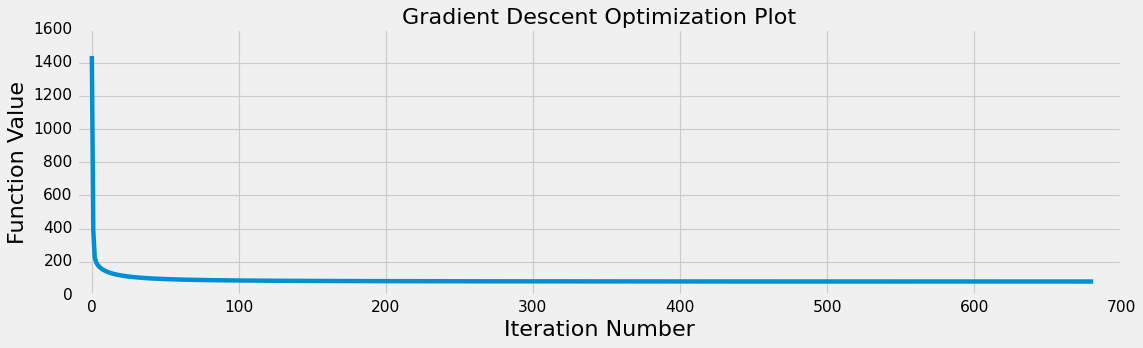

In [416]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1, 1, figsize = (15,4))

plt.plot(df.index.tolist(), df.FunctionValue, )
plt.xlabel("Iteration Number", fontsize = 20)
plt.ylabel("Function Value", fontsize = 20)
plt.title("Gradient Descent Optimization Plot", fontsize = 20);
plt.xlim([-10,700]);

# Critical points of polynomial function

**i** Generate a third degree polynomial in $x$ and $y$ named $g(x,y)$ that is based on your mobile number (Note : In case there is a 0 in one of the
digits replace it by 3). Suppose your mobile number is $9412821233$, then the polynomial would be 

$$ 
g(x,y) = 9x^3 - 4x^2y + 1xy^2 -2y^3 +8x^2 -2xy + 1y^2 -2x + 3y -3
$$

where alternate positive and negative sign are used. 

> **Deliverable(s) : The polynomial constructed should be reported. (0.5)**

```octave
## Author: vinayak <vinayak@vinayak-EXIGO-V2>
## Created: 2022-02-21
% Script to read a phone number and create a polynomial 

function [pol] = qn31()
  a = input("Enter your mobile number\n");
  % Allocate memory for the polynomial to be created
  pol = []; 
  num = a;
  counter = 1;
  
  % Parse through the input number and then convert them 
  % into a vector of values in sequential manner
  % Alternate +ve and -ve signs for co-efficients
  % If a zero is present in the number, substitute it with +-3
  while num > 1,
    
    x = mod(num, 10);
    if x == 0,
      x = 3;
    endif;  
    
    if mod(counter, 2) == 1,
      x = -x;
    endif;  
    
    pol = [pol; x];
    num = idivide(num, 10);
    counter = counter + 1;
  endwhile
  
  % Flip around the polynomial co-efficients
  pol = transpose(flip(pol));
  displayPolynomial(pol);
end

function [] = displayPolynomial(pol)
    % Function to display the formed polynomial
    polynomial_terms = ["x^3"; "x^2y"; "xy^2 "; "y^3"; "x^2"; "xy"; "y^2"; "x"; "y"; " "];
    poly_str = [""];
    
    for i=1:length(pol),
      if mod(i,2) == 0,
        poly_str = [poly_str num2str(pol(i)) polynomial_terms(i, :)];
      else
        poly_str = [poly_str " +" num2str(pol(i)) polynomial_terms(i, :)];
      endif
    endfor
    
    printf("Polynomial generated from the entered mobile number\n");
    disp(poly_str);
    
endfunction
```

In [4]:
def generate_polynomial() -> List:
    """Prompts the user for input and generates a polynomial based on the mobile number generated by the user. 
    Assumption: Mobile numbers can only be 10 digits long 

    Returns:
        List: Co-efficient list for the polynomial
    """
    number = input("Enter your cell number:\n")

    # Validate the entered input
    try:
        _ = int(number.strip())
    except Exception as e:
        print(f"Incorrect input format. Please enter a number!")
        return []

    if len(number.strip()) != 10:
        print("Please enter a valid number. Mobile number must be 10 digits long!")  
        return []
    
    polynomial_coefs = []
    for idx, chr in enumerate(number):
        coef = int(chr)
        # In case there's a zero in the mobile number replace it with a 3
        if coef == 0: coef = 3
        # Alternate + and - in coefficients
        if idx % 2 == 1:
            coef = -1 * coef
        polynomial_coefs.append(coef)
    
    return polynomial_coefs

def display_polynomial(coefs: List):
    """[Given a list of co-efficients, displays a polynomial]

    Args:
        coefs (List): A coe-efficient polynomial
    """
    terms = ["x^3", "x^2y", "xy^2", "y^3", "x^2", "xy", "y^2", "x", "y", "1"]
    
    polynomial = ""
    for idx, (coef, term) in enumerate(zip(coefs, terms)):
        if idx % 2 == 0:
            polynomial += f"+{coef}{term}"
        else:
            polynomial += f"{coef}{term}"
    polynomial = polynomial[:-1]
    
    # Print if there is a polynomial generated for reporting
    if polynomial:
        print(f"\nPolynomial corresponding to your phone number\n{polynomial}")

$$
\pagebreak
$$

In [22]:
# Generate a polynomial with invalid input
poly = generate_polynomial()
display_polynomial(poly)

Enter your cell number:
 adaw123


Incorrect input format. Please enter a number!


In [16]:
# Generate a polynomial with fewer/more than 10 digits
poly = generate_polynomial()
display_polynomial(poly)

Enter your cell number:
 77358


Please enter a valid number. Mobile number must be 10 digits long!


In [17]:
# Generate a plynomial with valid input
poly = generate_polynomial()
display_polynomial(poly)

Enter your cell number:
 7738368566



Polynomial corresponding to your phone number
+7x^3-7x^2y+3xy^2-8y^3+3x^2-6xy+8y^2-5x+6y-6


$$
\pagebreak
$$

**ii** Write a code to find all critical points of $g(x, y)$. You may use built in functions like `solve` (or other similar functions) in Octave/Matlab to find the critical points. 

> **Deliverable(s) : The code that finds the critical points along with the display of all the calculated critical points. (1)**

![](32_critical_points.jpeg)

```octave
## Author: vinayak <vinayak@vinayak-EXIGO-V2>
## Created: 2022-02-23
% Script to find out the critical points of a polynomial

function [critical_points] = qn32(pol)
  
  % Display the polynomial created from the given cell number
  disp("Polynomial co-efficients entered is as follows");
  disp(pol);
  
  % Create a container to hold the solution values
  critical_points = [];
  
  % Find out the critical points using fsolve
  % Start at different points in the function domain using random
  % Variables and then find the roots of grad(pol) = 0
 
  for i = 1:1000,
    % Define the start point
    startPoint = 1000 * randn(2, 1);
    % Create a wrapper function for the objective/optimization function
    optimFunc = @(pol) @(startPoint) optimizationFunction(startPoint, pol);
    % Define the solver options
    options = optimset ("TolFun", 1e-6, "MaxIter", 5000);
    % Find solutions to the above objective function
    [sol, fval, info] = fsolve(optimFunc(pol), startPoint, options);
    % If the solution converged in this iteration, save the 
    % Point as a critical point in the matrix
    if info == 1,
      critical_points = addToSolution(critical_points, sol);
    endif;
  endfor
  
endfunction

function [distance] = euclideanDistance(v1, v2)
  % Given two vectors v1 and v2, compute the Euclidean distance between them
  distance = sqrt(sum((v1 - v2).^2));
endfunction

function [sol] = addToSolution(solutionSet, newSolution)
  % Given a set of critical points and a new critical point
  % Check if the new point is already present in the given set
  % If no, add it to the solution set, else return the set as is
  n = size(solutionSet)(2);
  present = 0;
  for i = 1:n,
    r = euclideanDistance(solutionSet(:, i), newSolution);
    if r < 1e-6,
      present = 1;
      break;
    endif  
  endfor  
  
  % If the solution doesn't exist in the current set, add it to
  % The current set, otherwise, just return old solution set as is
  if present == 0,
    sol = [solutionSet, newSolution];
  else
    sol = solutionSet;
  endif;  
  
endfunction  

function [out] = optimizationFunction(startPoint, g)
  % Start with the x and y values at this given step
  x = startPoint(1);
  y = startPoint(2);
  
  % Solve for delg/delx = 0; delg/dely = 0 simultaneously
  gx = 3*g(1)*x^2 + 2*g(2)*x*y + g(3)*y^2 + 2*g(5)*x + g(6)*y + g(8);  
  gy = g(2)*x^2 + 2*g(3)*x*y + 3*g(4)*y^2 + g(6)*x + 2*g(7)*y + g(9);
  out = [gx gy];
endfunction
```

In [5]:
from scipy.optimize import fsolve
from typing import List, Tuple

import warnings, random
warnings.filterwarnings("error")

def func_val(x, y):
    return (g[0])*(x**3) + (g[1])*(x*y) + (g[2])*(y**2) + (2*g[4])*(x) + (g[5])*(y) + (g[7])

def find_critical_points(polynomial: List) -> List:
    """[Accepts a polynomial of 3rd degree in x and y and finds out the critical points of the same in an iterative manner]

    Args:
        polynomial (List): Co-efs of 3rd degree polynomial as a list

    Returns:
        List: A dataframe of solutions
    """
    g = polynomial
    
    # Define the system of simultaneous equations for scipy to solve
    def equations(p):
        x, y = p

        gx = (3*g[0])*(x**2) + (2*g[1])*(x*y) + (g[2])*(y**2) + (2*g[4])*(x) + (g[5])*(y) + (g[7])
        gy = (g[1])*(x**2) + (2*g[2])*(x*y) + (3*g[3])*(y**2) + (g[5])*(x) + (g[6])*(y) + (g[8])

        return (gx, gy)

    solutions = []
    counter = 0

    # Select a random starting point in the R2 landscape and iterate for 1000 
    # times in this landscape to find roots of the equation
    while counter < 1000:
        initial_x, initial_y = random.randint(-10000, 10000), random.randint(-10000, 10000)
        try:
            # Try to solve the equations
            x, y =  fsolve(equations, (initial_x, initial_y))
            counter += 1

            # Rounding in order to avoid solutions which differ by a very thin margin
            # i.e. in the 8th or 9th decimal place
            sol = (round(x,7),round(y,7))
            
            # If the solution has not been encountered, then add it to the set of
            # solutions container defined above
            if not (sol in solutions):
                solutions.append(sol)
                
        except RuntimeWarning:
            # This is to suppress the solutions which do not converge and simply 
            # raise a warning that the solution didn't converge
            pass
    
    return solutions

In [9]:
# Find the critical points of a random polynomial
g = generate_polynomial()
solutions = find_critical_points(g)

# Show the critical points
display_polynomial(g)
for idx, point in enumerate(solutions):
    print(f"CP{idx:2d}: (x ={point[0]: .5f}, y ={point[1]: .5f})")

Enter your cell number:
 7738368566



Polynomial corresponding to your phone number
+7x^3-7x^2y+3xy^2-8y^3+3x^2-6xy+8y^2-5x+6y-6
CP 0: (x =-0.53201, y = 0.65738)
CP 1: (x = 0.59938, y = 0.47341)
CP 2: (x =-0.70123, y =-0.45777)
CP 3: (x = 0.21693, y =-0.27483)


$$
\pagebreak
$$

**iii** Write a code to determine whether they correspond to a maximum, minimum or a saddle point.


> **Deliverable(s) : The code that identifies the type of critical points. The critical points and their type must be presented in the form of the table
generated by code for the above polynomial.**

![](33_hessian.jpeg)

```octave
## Author: vinayak <vinayak@vinayak-EXIGO-V2>
## Created: 2022-02-23
% Script to find out the nature of critical points of a polynomial function in 2 variables

function [] = qn33 (pol)
  
  % Call the routine to take input and find the critical points of a function
  [cp] = qn32(pol);
  
  % Iterate over the individual points, find out their nature and tabulate them
  % Find out the number of critical points obtained
  n = size(cp)(2);
  
  for i = 1:n,
    [evals, nature] = hessian(pol, cp(:, i));
    printf("\nCritical Point\n");%, num2str(i));
    disp(transpose(cp(:, i)));
    printf("\nEigen Values of Hessian for this critical point as follows\n");
    disp(evals);
    printf("\nNature of the critical point: ");
    disp(nature);
  endfor
  
endfunction

function [evals, nature] = hessian(g, cp)
  % Given a polynomial and it's critical point, computes the
  % hessian matrix and it's eigen values at this point
  x = cp(1, 1); y = cp(2, 1);
  
  % Define the second order partial derivative hessian matrix
  h11 = 6*g(1)*x + 2*g(2)*y + 2*g(5);
  h12 = 2*g(2)*x + 2*g(3)*y + g(6);
  h21 = h12;
  h22 = 2*g(3)*x + 6*g(4)*y + 2*g(7);  
  hessian = [h11 h12; h21 h22];
  
  % Find the eigen vector/eigen value pairs for the hessian matrix
  [_, evs] = eigs(hessian);
  
  % Find out the nature of evs
  sgn = 1;
  evals = [];
  for i = 1:length(evs),
    sgn = sign(evs(i,i)) * sgn;
    evals = [evals evs(i, i)];
  endfor  
  
  % If all eigen values of hessian > 0 ===> Minima
  % If all eigen values of hessian < 0 ===> Maxima
  % If both +ve & -ve eigen values     ===> Saddle
  if sgn == -1,
    nature = "saddle";
  elseif (sgn == 1) && (evs(1,1) > 0),
    nature = "minima";
  elseif (sgn == 1) && (evs(1,1) < 0),
    nature = "maxima";
  endif  
endfunction
```

In [20]:
def determine_nature(polynomial: List, critical_point: Tuple, threshold: float = 1e-6) -> str:
    """[Given a polynomial and an identified critical point for the polynomial,
    computes if the point is a maxima, minima or saddle point]

    Args:
        polynomial (List): Co-efficients of the polynomial
        critical_point (Tuple): A critical point in R2
        threshold (float, default: 1e-6): A zero threshold (i.e. whether the eigen value found is zero or not) 

    Returns:
        str: Type of the point
    """
    g = polynomial
    cx, cy = critical_point

    # Compute hessian matrix values
    h11 = 6*g[0]*cx + 2*g[1]*cy + 2*g[4]
    h12 = 2*g[1]*cx + 2*g[2]*cy + g[5]
    h21 = h12
    h22 = 2*g[2]*cx + 6*g[3]*cy + 2*g[6]

    # Find the determinant of this hessian matrix
    D = h11 * h22 - h12 * h21
       
    # Check the signs of eigen values
    if abs(D) < threshold:
        return "inconclusive"
    elif D < 0:
        return "saddle"
    elif ((D > 0) and (h11 > 0)):
        return "minima"
    elif ((D > 0) and (h11 < 0)):
        return "maxima"

In [21]:
# Find the critical points of a random polynomial
g = generate_polynomial()
solutions = find_critical_points(g)

# Show the Polynomial
display_polynomial(g)
print()

# Determine the nature of the critical points and print the same
for idx, point in enumerate(solutions):
    nature = determine_nature(g, point)
    print(f"CP{idx:2d}: (x ={point[0]: .5f}, y ={point[1]: .5f}) | Nature: {nature}")

Enter your cell number:
 7738368566



Polynomial corresponding to your phone number
+7x^3-7x^2y+3xy^2-8y^3+3x^2-6xy+8y^2-5x+6y-6

CP 0: (x =-0.70123, y =-0.45777) | Nature: saddle
CP 1: (x = 0.21693, y =-0.27483) | Nature: minima
CP 2: (x = 0.59938, y = 0.47341) | Nature: saddle
CP 3: (x =-0.53201, y = 0.65738) | Nature: maxima
